<a href="https://colab.research.google.com/github/vorotnikov-nikita/PrPrPr/blob/main/Praktica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing as prepro
import ipywidgets as widg

from IPython.display import display
from google.colab import widgets
from google.colab import output
from matplotlib import pylab
from six.moves import zip
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data", header=None)
data.head (3)

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1


In [ ]:
names = ["Id","RI","Na","Mg","Al","Si","K","Ca","Ba","Fe","Class"]
data.columns = names
data = data.drop(columns=["Id"])
data.head (3)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1


In [ ]:
data['Class'].replace (
                         {
                            1: "building_windows_float_processed",
                            2: "building_windows_non_float_processed",
                            3: "vehicle_windows_float_processed",
                            4: "vehicle_windows_non_float_processed",
                            5: "containers",
                            6: "tableware",
                            7: "headlamps"
                               }, inplace = True)
data.head (7)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,building_windows_float_processed
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,building_windows_float_processed
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,building_windows_float_processed
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,building_windows_float_processed
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,building_windows_float_processed
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,building_windows_float_processed
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,building_windows_float_processed


In [ ]:
for col in data.columns:
  fr = np.random.randint(5,10)/100
  data.loc[data.sample(frac=fr).index, col] = np.nan

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      195 non-null    float64
 1   Na      199 non-null    float64
 2   Mg      197 non-null    float64
 3   Al      197 non-null    float64
 4   Si      199 non-null    float64
 5   K       201 non-null    float64
 6   Ca      203 non-null    float64
 7   Ba      203 non-null    float64
 8   Fe      201 non-null    float64
 9   Class   203 non-null    object 
dtypes: float64(9), object(1)
memory usage: 16.8+ KB


In [ ]:
for col in data.columns:
  missing_values_counts = data[col]. isna(). sum()
  percentage = data[col].isna().sum()/len(data[col]) 
  print("column", col, "constains", missing_values_counts, "NULL values",percentage)


column RI constains 19 NULL values 0.08878504672897196
column Na constains 15 NULL values 0.07009345794392523
column Mg constains 17 NULL values 0.0794392523364486
column Al constains 17 NULL values 0.0794392523364486
column Si constains 15 NULL values 0.07009345794392523
column K constains 13 NULL values 0.06074766355140187
column Ca constains 11 NULL values 0.0514018691588785
column Ba constains 11 NULL values 0.0514018691588785
column Fe constains 13 NULL values 0.06074766355140187
column Class constains 11 NULL values 0.0514018691588785


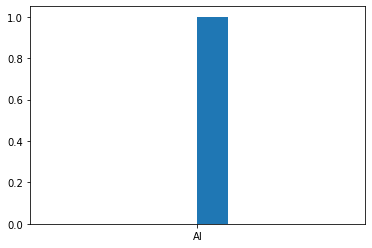

In [ ]:
col = 'Al'
plt.hist(col)
plt.show()

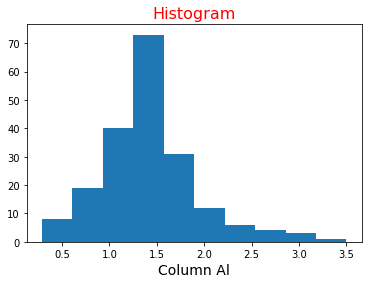

In [ ]:
fig, ax=plt.subplots()

ax.hist(data[col])
ax.set_xlabel("Column "+str(col), fontsize=14)
ax.set_title("Histogram", fontsize=16, color ='red')

plt.show()

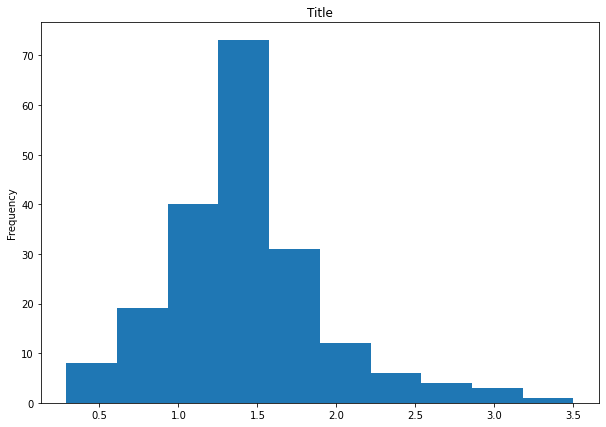

In [ ]:
# data.plot(figsize=(15,8))
ax = data[col].plot(kind='hist', figsize=(10,7))
ax.set_title('Title')

plt.show()

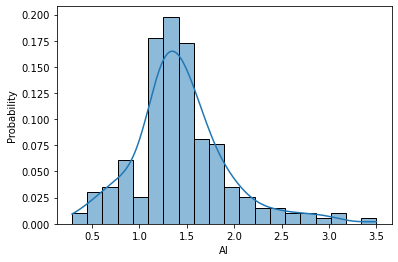

In [ ]:
sns.histplot(data=data, x='Al',
             bins=20, 
             kde=True,
             stat='probability')
plt.show()

In [ ]:
df1 = data['Class'].value_counts()
df1 

building_windows_non_float_processed    73
building_windows_float_processed        66
headlamps                               27
vehicle_windows_float_processed         17
containers                              12
tableware                                8
Name: Class, dtype: int64

In [ ]:
df1.index.values

array(['building_windows_non_float_processed',
       'building_windows_float_processed', 'headlamps',
       'vehicle_windows_float_processed', 'containers', 'tableware'],
      dtype=object)

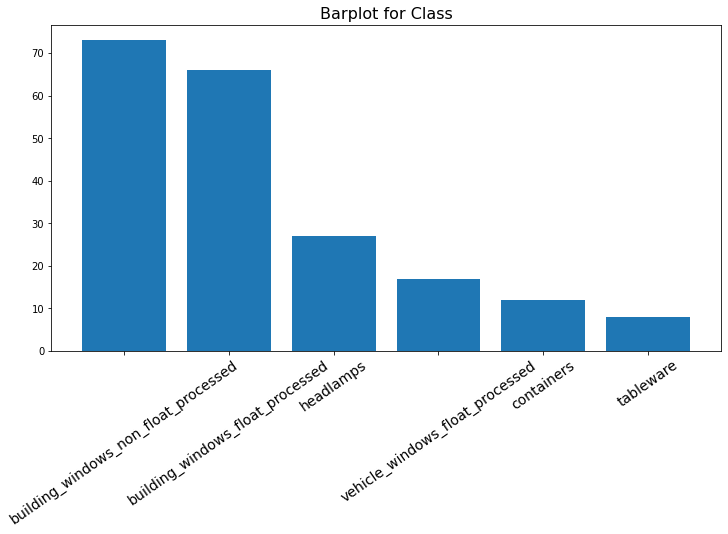

In [ ]:
col1 = 'Class'

fig, ax = plt.subplots(figsize = (12,6))

ax.bar(data['Class'].value_counts().index.values,
       data['Class'].value_counts().values)

ax.set_xlabel(None, fontsize = 16 )
ax.set_title('Barplot for '+str(col1), fontsize=16)
ax.tick_params(axis='x', which='major',
               labelsize=14, rotation=35)

plt.show()

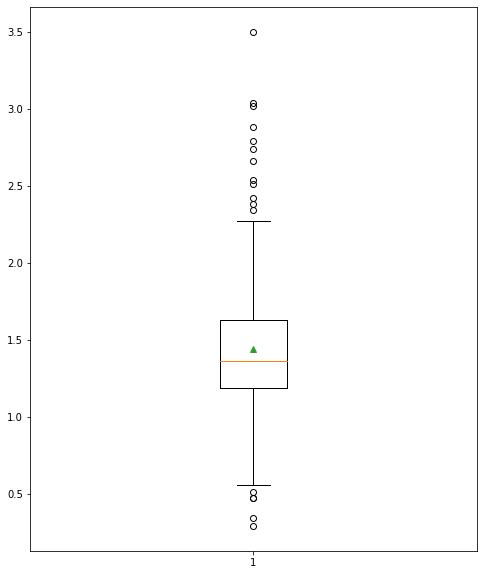

In [ ]:
# np.isnan(data['Al'])
# data['Al'][~np.isnan(data['Al'])]

fig3, ax3 = plt.subplots(figsize = (8, 10))

ax3.boxplot(data['Al'][~np.isnan(data['Al'])], showmeans=True)

plt.show()

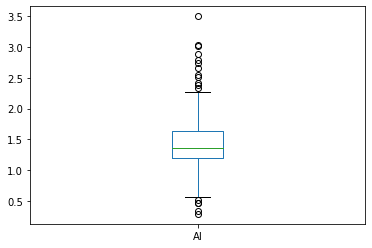

In [ ]:
data[col].plot(kind = 'box')
plt.show()

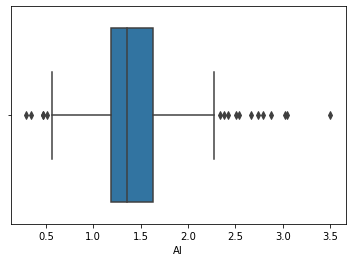

In [ ]:
sns.boxplot(data=data, x=col)
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


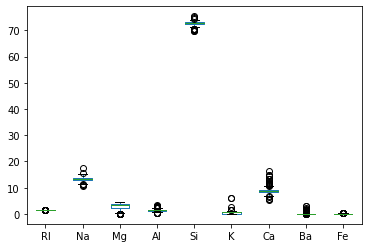

In [ ]:
data.plot(kind='box')
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


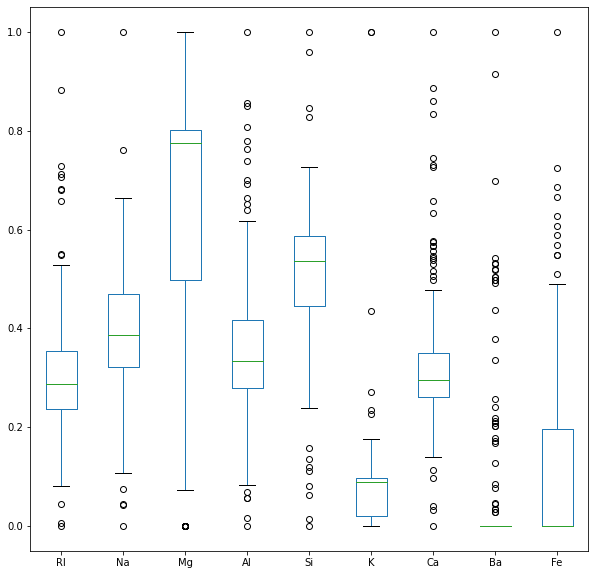

In [ ]:
scaler = prepro.MinMaxScaler()
dataScaled = scaler.fit_transform(data[data.columns.values[data.columns.values != 'Class']])

dataScaled = pd.DataFrame(dataScaled, 
                          columns = data.columns.values[data.columns.values != 'Class'])
dataScaled.plot(kind = 'box', figsize = (10, 10))

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


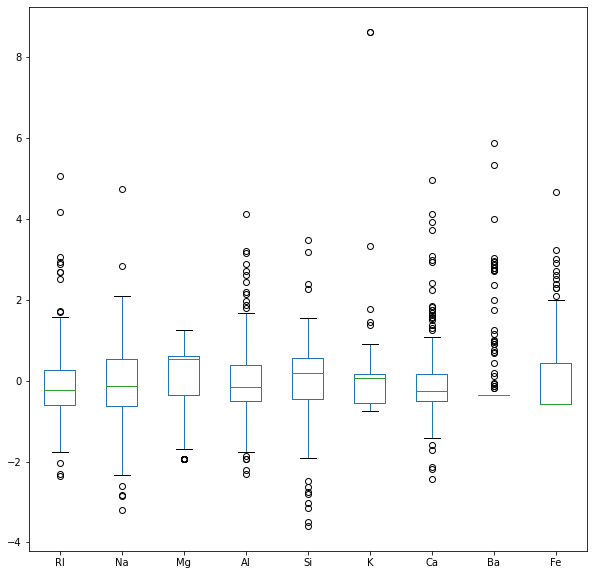

In [ ]:
scaler_standart = prepro.StandardScaler()

DataScaled_standart = scaler_standart.fit_transform(data[data.columns.values[data.columns.values != 'Class']])
DataScaled_standart = pd.DataFrame(DataScaled_standart, columns = data.columns.values[data.columns.values != 'Class'])

DataScaled_standart.plot(kind = 'box', figsize = (10, 10))

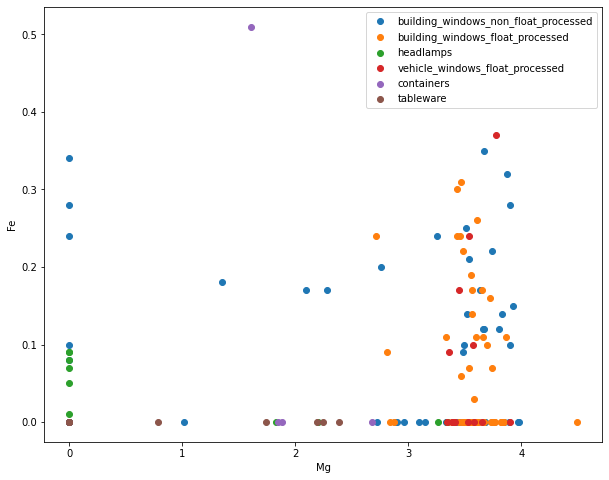

In [ ]:
fig, ax = plt.subplots(figsize = (10, 8))

for glassType in data['Class'].value_counts().index.values:
  ax.scatter(data['Mg'][data['Class'] == glassType],
             data['Fe'][data['Class'] == glassType],
             label = glassType)

# ax.scatter(data['Mg'], data['Fe'])
ax.set_xlabel('Mg')
ax.set_ylabel('Fe')
ax.legend()

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


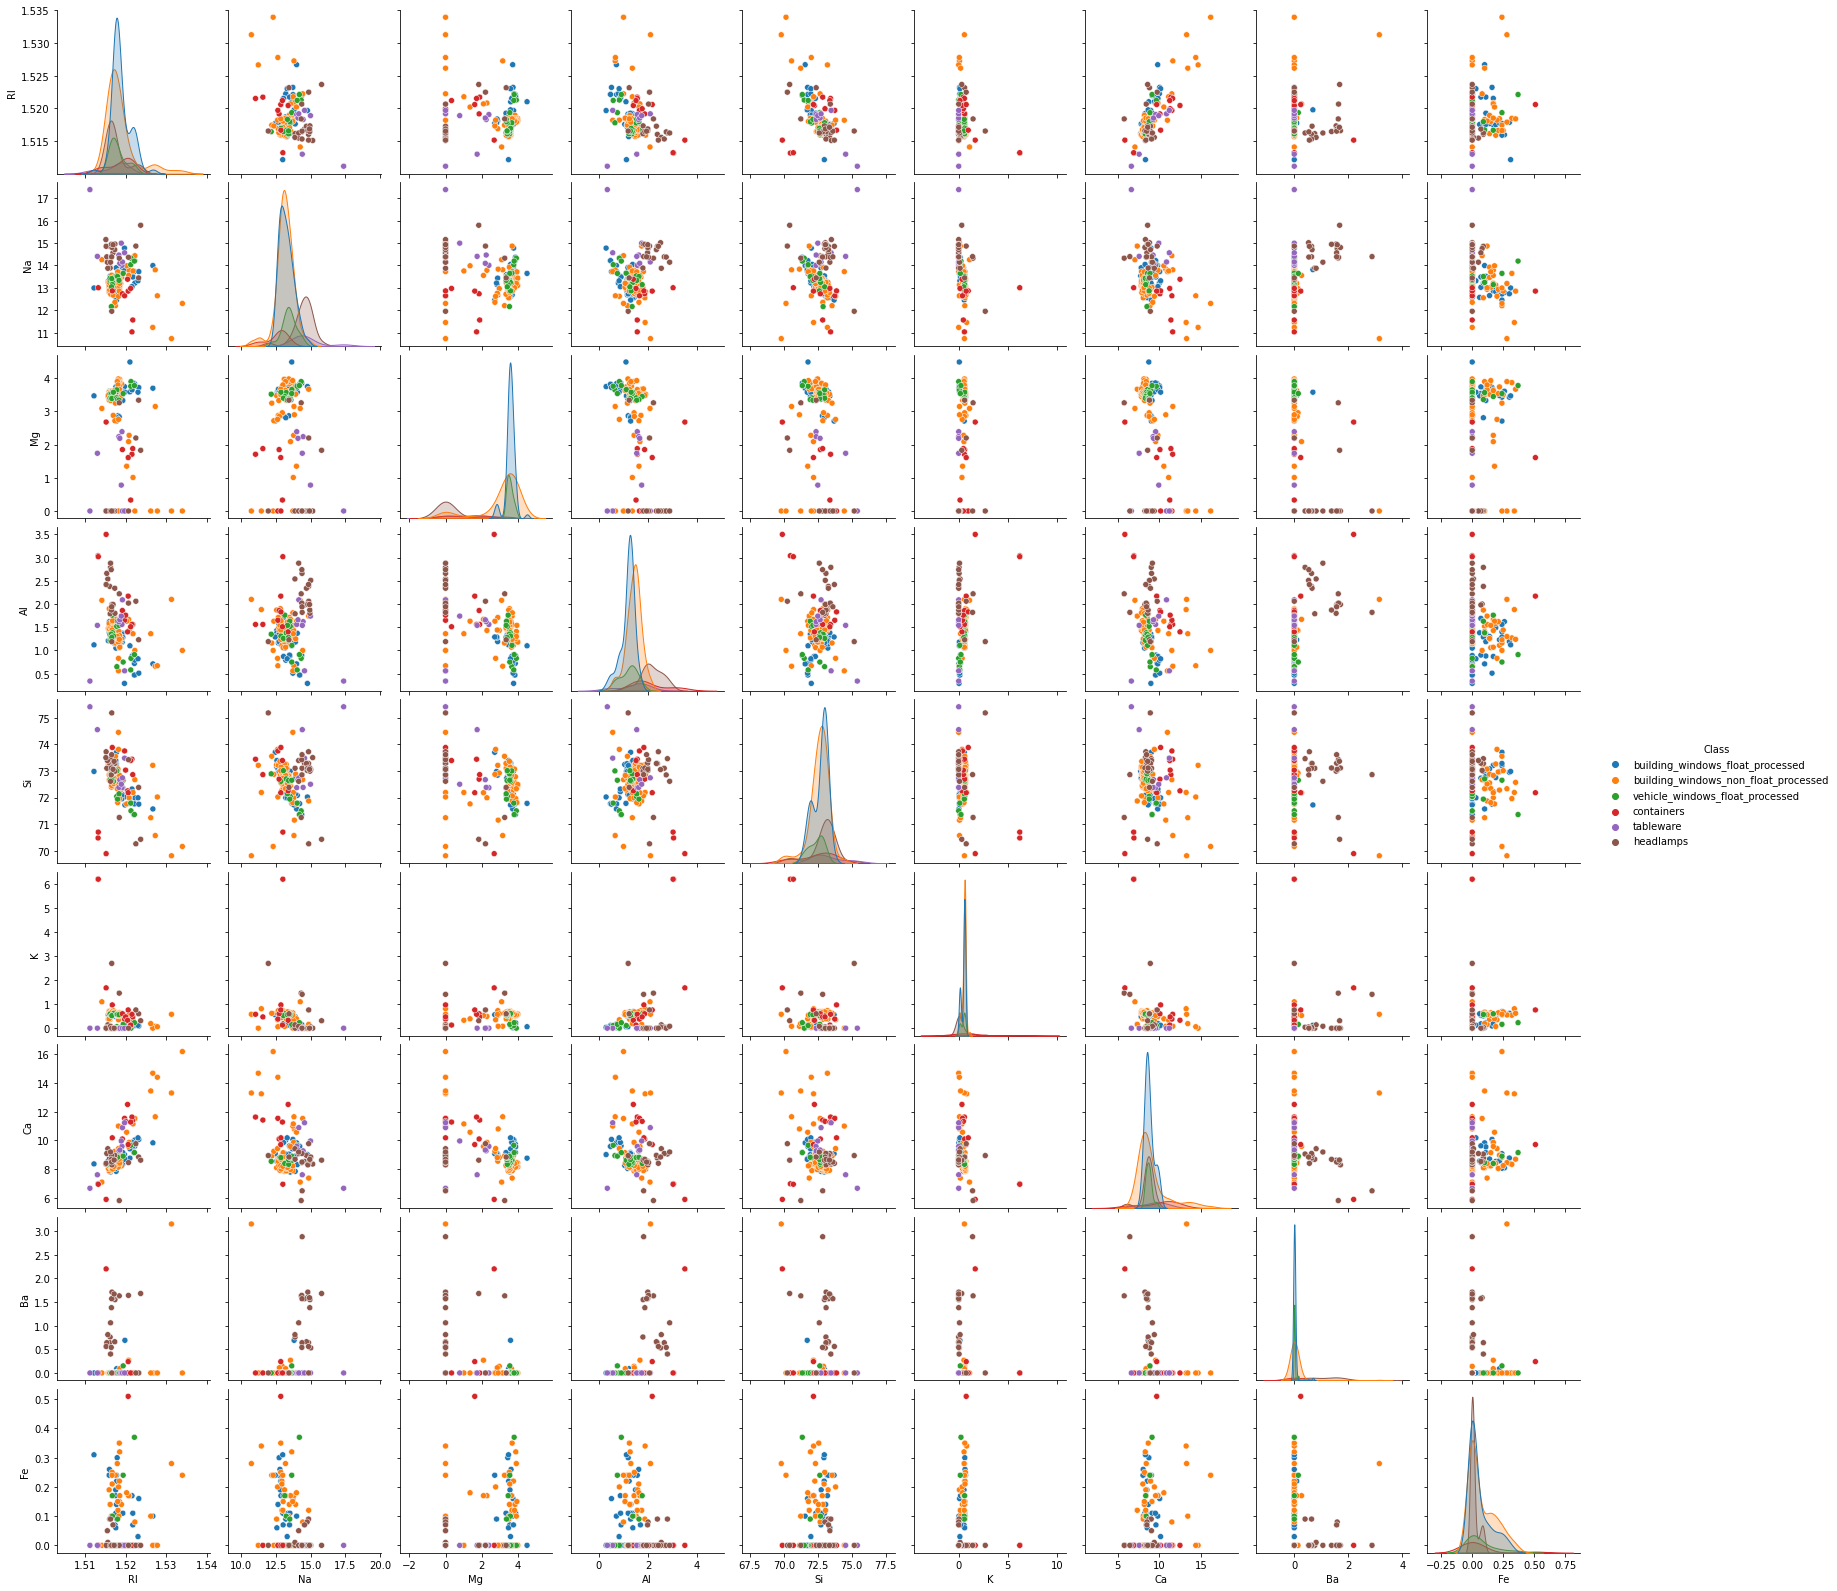

In [ ]:
sns.pairplot(data = data, hue='Class')
plt.show()

In [ ]:
# data.mean()
# data_fiiled_nan.info()

# data['Class'].value_counts().index.values[0]
# data['Class'].mode()

In [ ]:
data_fiiled_nan = data.fillna(data.mean()).copy()
data_fiiled_nan['Class'].fillna(data['Class'].value_counts().index.values[0], inplace=True)

In [ ]:
data_fillna_mean = data.fillna(data.mean()).copy()
data['Class'].value_counts().index.values[0]
data['Class'].mode()
data_fillna_mean['Class'].fillna(data['Class'].value_counts().index.values[0], inplace = True)

In [ ]:
pca = PCA()
pca.fit(data_fiiled_nan[data_fiiled_nan.columns[data_fiiled_nan.columns.values != 'Class']])

pca.explained_variance_ratio_*100

array([4.67390171e+01, 2.59862017e+01, 1.10480565e+01, 9.96997143e+00,
       3.80760660e+00, 1.59871477e+00, 7.17826124e-01, 1.32580260e-01,
       2.55051580e-05])

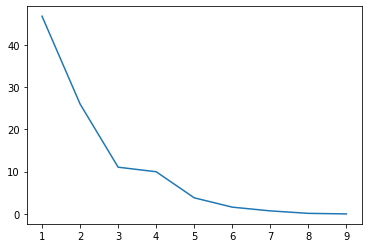

In [ ]:
fig, ax = plt.subplots()
ax.plot(np.arange(1, 10) ,pca.explained_variance_ratio_*100)

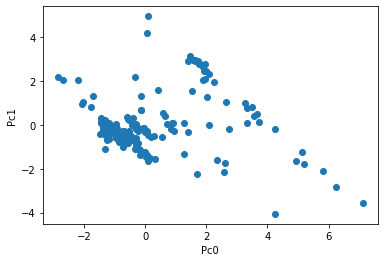

In [ ]:
result = pca.transform(data_fiiled_nan[data_fiiled_nan.columns.values[data_fiiled_nan.columns.values != 'Class']])

pca_Names = []

for i in range(9):
  pca_Names.append('Pc' + str(i))

data_pca = pd.DataFrame(result,columns=pca_Names) 
fig, ax = plt.subplots()

ax.scatter(data_pca['Pc0'], data_pca['Pc1'])
ax.set_xlabel('Pc0')
ax.set_ylabel('Pc1')

plt.show()

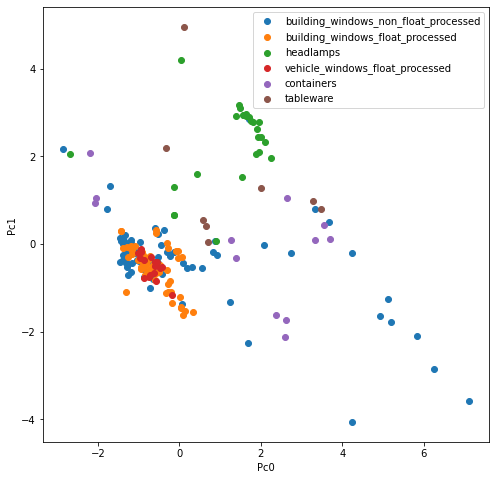

In [ ]:
data_pca['Class'] = data_fillna_mean['Class'].copy()

col1 = 'Pc0'
col2 = 'Pc1'

fig, ax = plt.subplots(figsize=(8, 8))

for glassType in data_pca['Class'].value_counts().index.values:
  ax.scatter(data_pca[col1][data_pca['Class'] == glassType], 
             data_pca[col2][data_pca['Class'] == glassType],
             label = glassType)
  ax.set_xlabel(col1)
  ax.set_ylabel(col2)
  ax.legend()

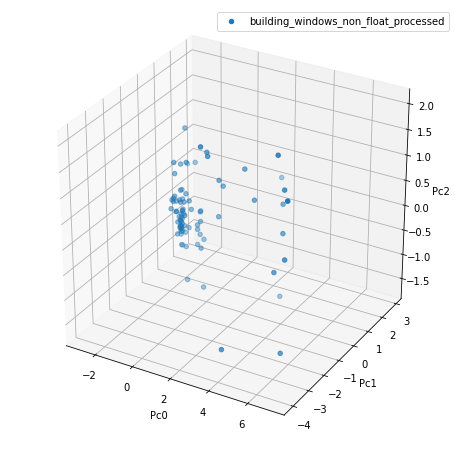

In [ ]:
col1 = 'Pc0'
col2 = 'Pc1'
col3 = 'Pc2'

# fig, ax = plt.subplots(figsize=(8, 8))
fig = plt.figure(figsize = (8, 8))
ax = plt.axes(projection = '3d')

for glassType in data_pca['Class'].value_counts().index.values:
  ax.scatter(data_pca[col1][data_pca['Class'] == glassType], 
             data_pca[col2][data_pca['Class'] == glassType],
             data_pca[col3][data_pca['Class'] == glassType],
             label = glassType)
  
  ax.set_xlabel(col1)
  ax.set_ylabel(col2)
  ax.set_zlabel(col3)

  ax.legend()

  plt.show()

  # plotly

  '''
  заполнить пробелы средним/модой по ктегориям 
  '''

In [ ]:
corr = data_fillna_mean.corr() 
corr

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
RI,1.000000,-0.165876,-0.131149,-0.359665,-0.507686,-0.266464,0.776376,0.024508,0.122191
Na,-0.165876,1.000000,-0.274228,0.102533,-0.056346,-0.237139,-0.281065,0.284453,-0.242501
Mg,-0.131149,-0.274228,1.000000,-0.408425,-0.204032,0.122072,-0.432470,-0.448295,0.068251
Al,-0.359665,0.102533,-0.408425,1.000000,-0.060946,0.339335,-0.234071,0.464815,-0.069214
Si,-0.507686,-0.056346,-0.204032,-0.060946,1.000000,-0.214277,-0.197231,-0.124857,-0.113245
K,-0.266464,-0.237139,0.122072,0.339335,-0.214277,1.000000,-0.276524,-0.060695,0.001894
Ca,0.776376,-0.281065,-0.432470,-0.234071,-0.197231,-0.276524,1.000000,-0.116648,0.117438
Ba,0.024508,0.284453,-0.448295,0.464815,-0.124857,-0.060695,-0.116648,1.000000,-0.060315
Fe,0.122191,-0.242501,0.068251,-0.069214,-0.113245,0.001894,0.117438,-0.060315,1.000000


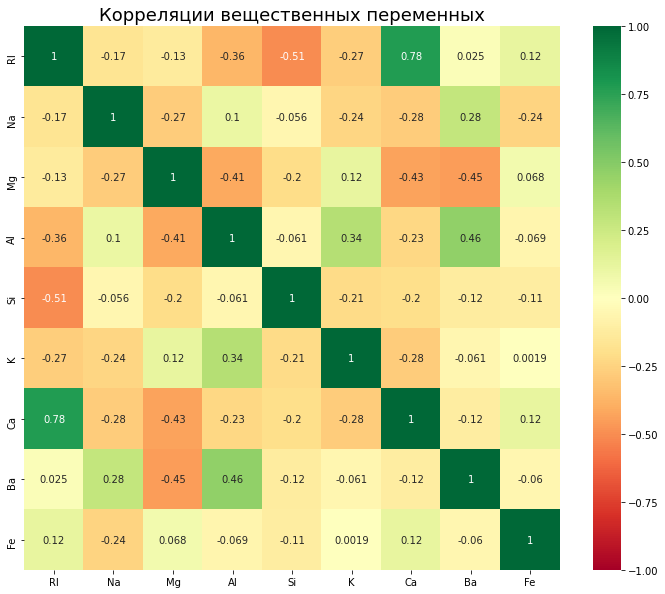

In [ ]:
plt.figure(figsize=(12, 10))
ax = sns.heatmap(corr, annot=True, vmax=1, vmin = -1, cmap='RdYlGn')
ax.set_title('Корреляции вещественных переменных', fontsize = 18)

plt.show()

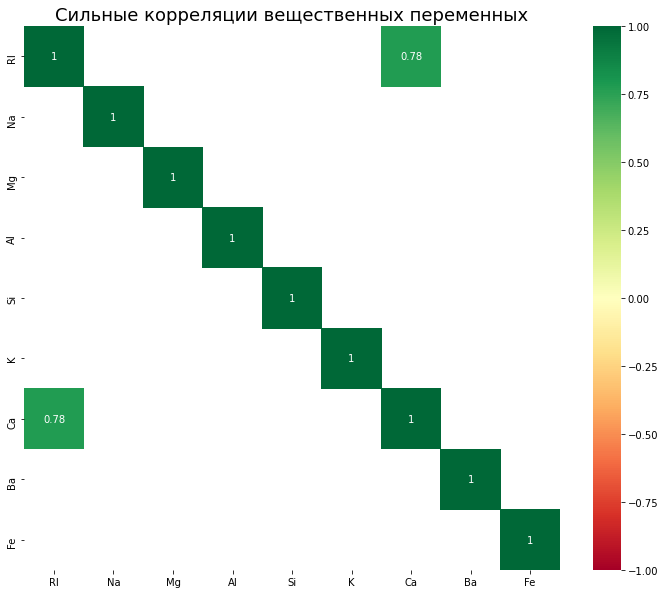

In [ ]:
plt.figure(figsize=(12, 10))
ax = sns.heatmap(corr[(corr >= 0.7) | (corr <= -0.7)], annot=True, vmax=1, vmin = -1, cmap='RdYlGn')
ax.set_title('Сильные корреляции вещественных переменных', fontsize = 18)

plt.show()

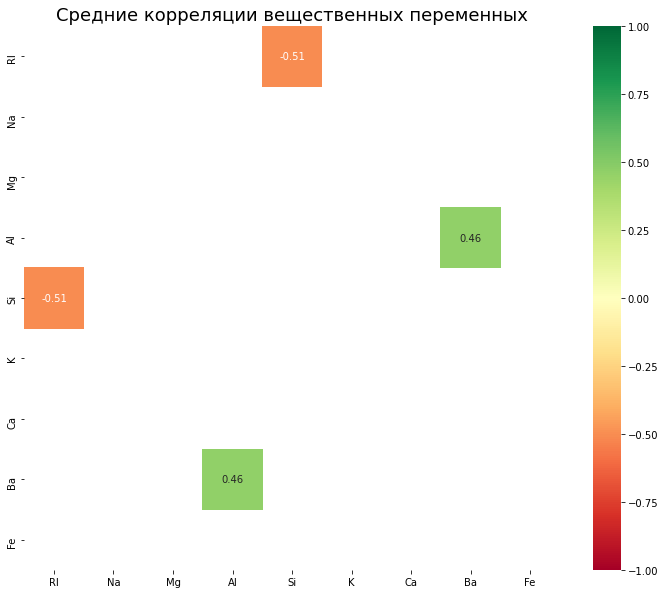

In [ ]:
# corr[(0.45 < corr[corr < 0.75]) | (corr[corr > -0.75] < -0.45)]

plt.figure(figsize=(12, 10))
ax = sns.heatmap(corr[(0.45 < corr[corr < 0.75]) | (corr[corr > -0.75] < -0.45)], 
                 annot=True, vmax=1, vmin = -1, cmap='RdYlGn')

ax.set_title('Средние корреляции вещественных переменных', fontsize = 18)

plt.show()

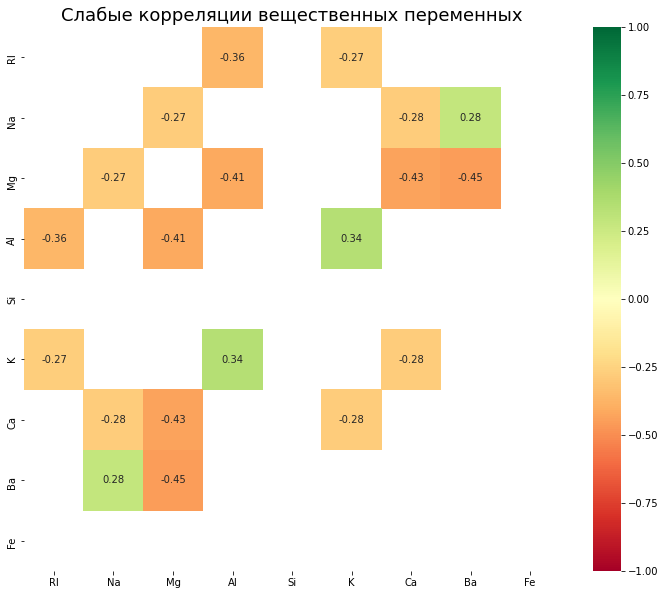

In [ ]:
plt.figure(figsize=(12, 10))
ax = sns.heatmap(corr[(0.25 < corr[corr < 0.45]) | (corr[corr > -0.45] < -0.25)], 
                 annot=True, vmax=1, vmin = -1, cmap='RdYlGn')

ax.set_title('Слабые корреляции вещественных переменных', fontsize = 18)

plt.show()

In [ ]:
forest = ExtraTreesClassifier(n_estimators=100)
forest.fit(data_fillna_mean[data_fillna_mean.columns.values[data_fillna_mean.columns.values != 'Class']], data_fillna_mean['Class'])

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [ ]:
# forest.feature_importances_
np.sort(forest.feature_importances_)[::-1]

array([0.16753827, 0.14364796, 0.132369  , 0.12332673, 0.10785962,
       0.09547912, 0.09540664, 0.07603209, 0.05834058])

In [ ]:
indices = np.argsort(forest.feature_importances_)[::-1]

print('Feature ranking:')
for f in range(9):
  print('%d. features %s (%f)' % (f + 1, data_fillna_mean.columns.values[indices[f]],forest.feature_importances_[indices[f]]))

Feature ranking:
1. features Mg (0.167538)
2. features Al (0.143648)
3. features RI (0.132369)
4. features Ca (0.123327)
5. features K (0.107860)
6. features Si (0.095479)
7. features Na (0.095407)
8. features Ba (0.076032)
9. features Fe (0.058341)


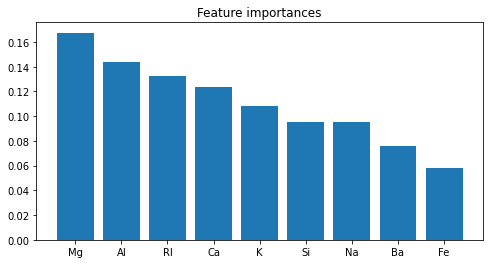

In [ ]:
fig, ax = plt.subplots(figsize = (8, 4))

ax.set_title('Feature importances')
ax.bar(data_fillna_mean.columns.values[indices],
       forest.feature_importances_[indices])
plt.show()

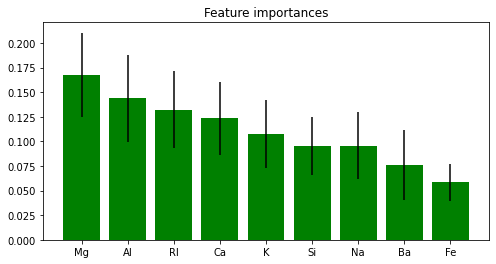

In [ ]:
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis = 0)

fig, ax = plt.subplots(figsize = (8, 4))

ax.set_title('Feature importances')
ax.bar(data_fillna_mean.columns.values[indices],
       forest.feature_importances_[indices],
       color='g', yerr=std[indices], align='center')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

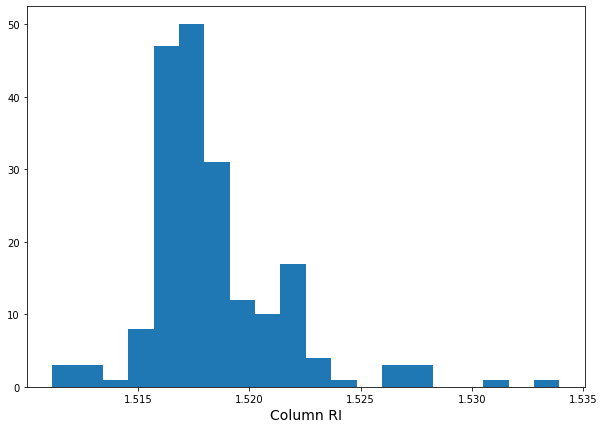

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

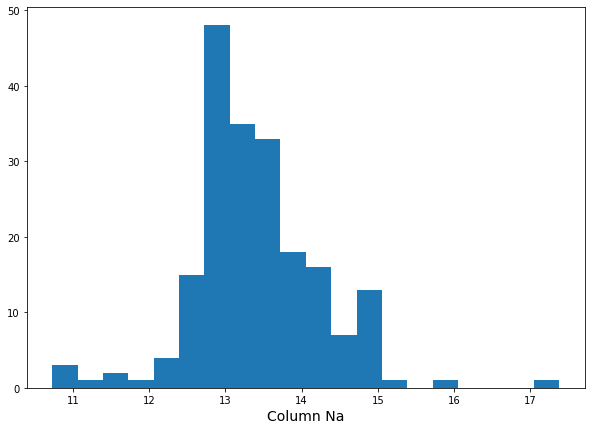

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

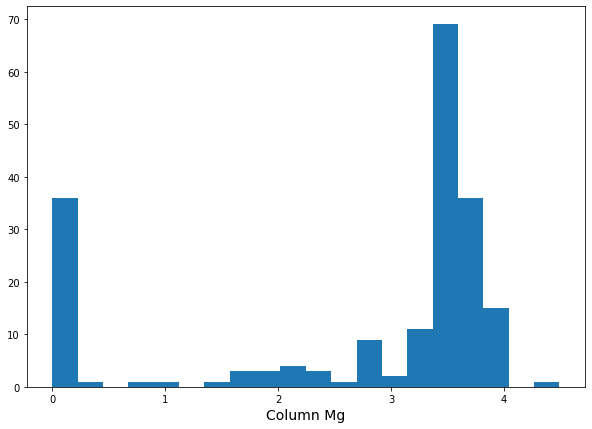

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

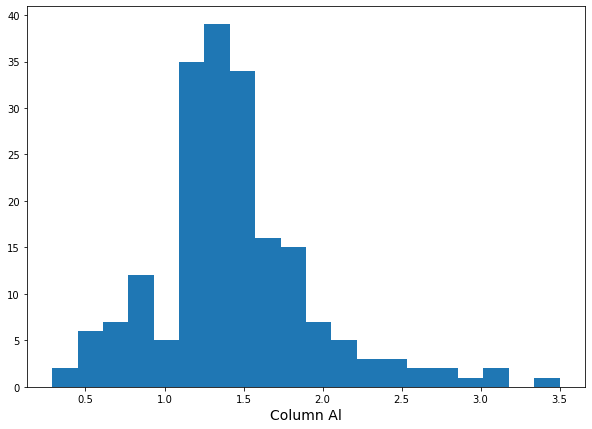

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

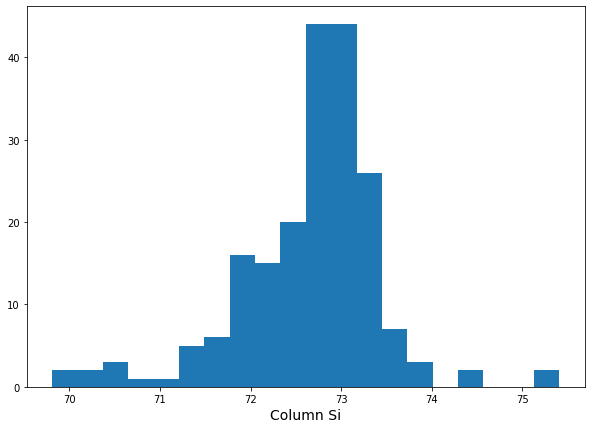

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

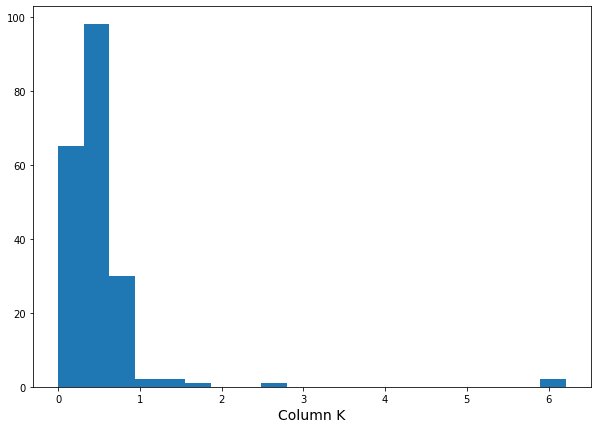

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

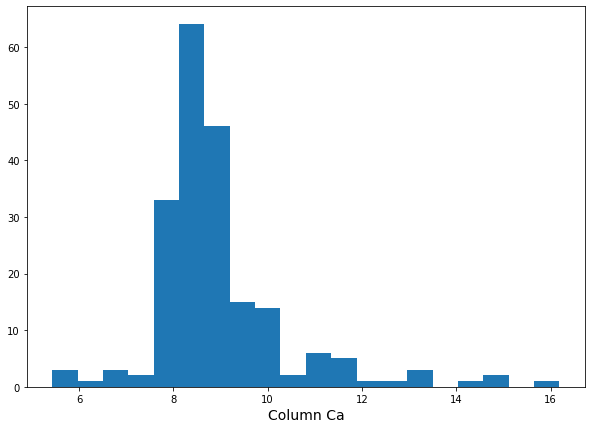

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

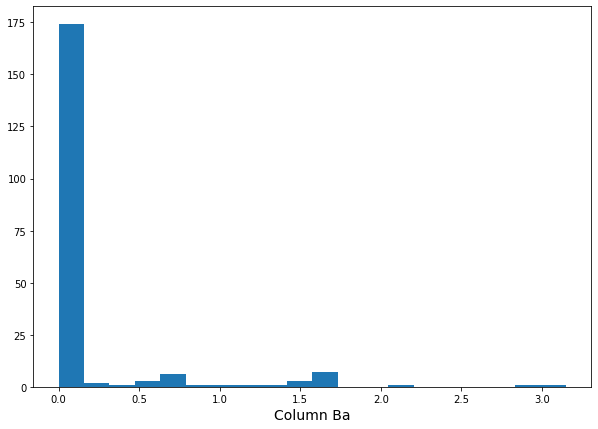

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

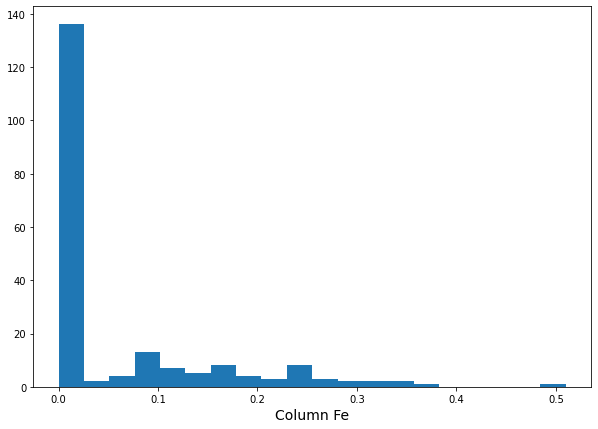

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

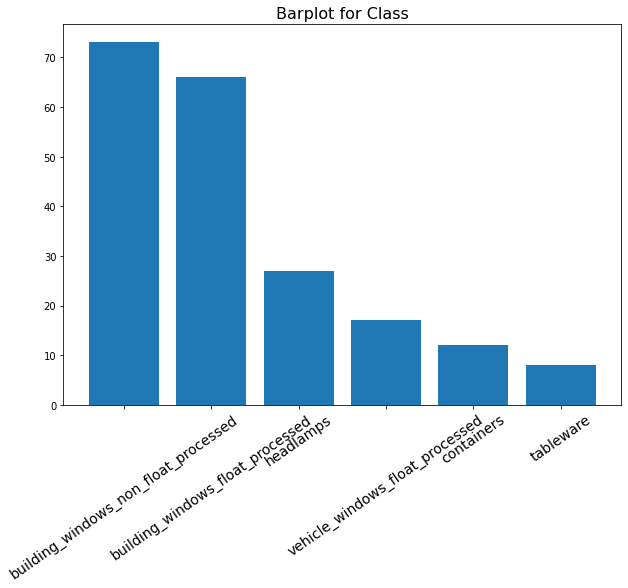

<IPython.core.display.Javascript object>

In [ ]:
columns = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Class']

tb = widgets.TabBar(columns, location='top')

def create_tub(ColName):
  with tb.output_to(str(ColName)):
    fig2, ax2 = plt.subplots(figsize=(10,7))
    if  ColName != 'Class':
      ax2.hist(data[ColName], bins=20)
      ax2.set_xlabel('Column ' + str(ColName), fontsize = 14)
    else:
      ax2.bar(data[ColName].value_counts().index.values, data[ColName].value_counts().values)
      ax2.set_xlabel(None, fontsize = 16 )
      ax2.set_title('Barplot for '+str(ColName), fontsize=16)
      ax2.tick_params(axis='x', which='major', labelsize=14, rotation=35)

    
for n in columns:
  create_tub(n)

2) диаграмма "ящик с усами"

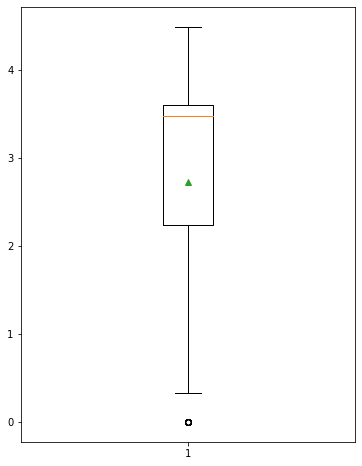

In [ ]:
#@title {run: "auto"}
Column_Name = "Mg" #@param ["RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe"] 

fig3, ax3 = plt.subplots(figsize = (6, 8))

ax3.boxplot(data[str(Column_Name)][~np.isnan(data[str(Column_Name)])], showmeans=True)

plt.show()

3) парный график с раскраской точек по классам

In [ ]:
#@title {run: "auto"}
Variable1 = "Na" #@param ["RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe"]
Variable2 = "Al" #@param ["RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe"]

pairButton = widg.Button(description="Show Pair Plot")
pairOutput = widg.Output()

def on_button_clicked(b):
  # Display the message within the output widget.
  with pairOutput:
    fig, ax = plt.subplots(figsize = (10, 8))

    for glassType in data['Class'].value_counts().index.values:
      ax.scatter(data[Variable1][data['Class'] == glassType],
                data[Variable2][data['Class'] == glassType],
                label = glassType)

    # ax.scatter(data['Mg'], data['Fe'])
    ax.set_xlabel(Variable1)
    ax.set_ylabel(Variable2)
    ax.legend()

    plt.show()

pairButton.on_click(on_button_clicked)
display(pairButton, pairOutput)


Button(description='Show Pair Plot', style=ButtonStyle())

Output()